In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set()
rand_state=1000

In [1]:
df = pd.read_csv('/Documents/School/SPRING 2022/ECON/HW2/nyc-rolling-sales.csv')
df_raw = df
df.head()

NameError: name 'pd' is not defined

I can see from this head vew that there are 22 columns of data which is actually high for a dataset. This means that it is going to contain a lot of data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

This shows the metadata for the dataset used.

In [4]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df['SALE DATE']= pd.to_datetime(df['SALE DATE'], errors='coerce')
df['sale_year'] = pd.DatetimeIndex(df['SALE DATE']).year.astype("category")
df['sale_month'] = pd.DatetimeIndex(df['SALE DATE']).month.astype("category")
pd.crosstab(df['sale_month'],df['sale_year'])

sale_year,2016,2017
sale_month,,
1,0,6871
2,0,6323
3,0,7705
4,0,6402
5,0,7461
6,0,8293
7,0,6319
8,0,5681
9,7779,0


In [5]:
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]

for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce') # coercing errors to NAs

In [6]:
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for col in categorical: 
    df[col] = df[col].astype("category")

The previous 2 boxes of code are constructing numerical and categorical variables.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  category      
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  category      
 11  RE

You can see in this information that the Dtype was changed in some of the variables.

In [8]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
sale_year                             0
sale_month                            0
dtype: int64

In [9]:
df.replace(' ',np.nan, inplace=True)
df.isna().sum() /len(df) *100

BOROUGH                             0.000000
NEIGHBORHOOD                        0.000000
BUILDING CLASS CATEGORY             0.000000
TAX CLASS AT PRESENT                0.872877
BLOCK                               0.000000
LOT                                 0.000000
EASE-MENT                         100.000000
BUILDING CLASS AT PRESENT           0.872877
ADDRESS                             0.000000
APARTMENT NUMBER                   77.466055
ZIP CODE                            0.000000
RESIDENTIAL UNITS                   0.000000
COMMERCIAL UNITS                    0.000000
TOTAL UNITS                         0.000000
LAND SQUARE FEET                   31.049818
GROSS SQUARE FEET                  32.658372
YEAR BUILT                          0.000000
TAX CLASS AT TIME OF SALE           0.000000
BUILDING CLASS AT TIME OF SALE      0.000000
SALE PRICE                         17.222170
SALE DATE                           0.000000
sale_year                           0.000000
sale_month

<AxesSubplot:>

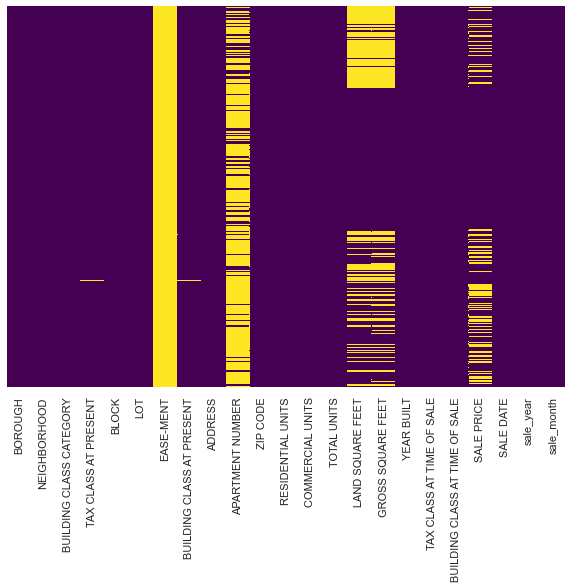

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We are checking to see how manu values are blank or NA's.

In [11]:
df.drop(["EASE-MENT","APARTMENT NUMBER"], axis=1, inplace=True)

We just go rid of the columns that had a lot of NA's

In [12]:
df=df.dropna() 

In [13]:
df.drop_duplicates(inplace=True)

<ipython-input-13-16cdb8520be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


We just got rid of all the NA's which is not ideal. We also dealt with all the duplicates in the data.

In [14]:
temp = df.copy()
for cols in temp.columns:
    temp[cols]=pd.to_numeric(temp[cols], errors='coerce') 
    
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47544 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         47544 non-null  int64  
 1   NEIGHBORHOOD                    0 non-null      float64
 2   BUILDING CLASS CATEGORY         0 non-null      float64
 3   TAX CLASS AT PRESENT            42401 non-null  float64
 4   BLOCK                           47544 non-null  int64  
 5   LOT                             47544 non-null  int64  
 6   BUILDING CLASS AT PRESENT       0 non-null      float64
 7   ADDRESS                         0 non-null      float64
 8   ZIP CODE                        47544 non-null  int64  
 9   RESIDENTIAL UNITS               47544 non-null  int64  
 10  COMMERCIAL UNITS                47544 non-null  int64  
 11  TOTAL UNITS                     47544 non-null  int64  
 12  LAND SQUARE FEET                

In [15]:
temp.describe().T

,count,mean,std,min,25%,50%,75%,max
BOROUGH,47544.0,3.256836e+00,9.049520e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
NEIGHBORHOOD,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUILDING CLASS CATEGORY,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TAX CLASS AT PRESENT,42401.0,1.428646e+00,8.524710e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
BLOCK,47544.0,4.993789e+03,3.431769e+03,1.000000e+00,2.218000e+03,4.666000e+03,6.983750e+03,1.631900e+04
LOT,47544.0,2.278511e+02,4.906937e+02,1.000000e+00,2.100000e+01,4.500000e+01,9.000000e+01,9.009000e+03
BUILDING CLASS AT PRESENT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADDRESS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIP CODE,47544.0,1.098669e+04,8.016274e+02,0.000000e+00,1.047000e+04,1.121700e+04,1.123800e+04,1.169400e+04
RESIDENTIAL UNITS,47544.0,2.553656e+00,1.723198e+01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.844000e+03


In [16]:
df[(df['SALE PRICE']<10000) | (df['SALE PRICE']>10000000)]['SALE PRICE'].count() /len(df)

0.24310112737674575

In [17]:
df2= df[(df['SALE PRICE']>10000) & (df['SALE PRICE']<10000000)].copy()
df2['SALE PRICE'].describe()

count    3.592500e+04
mean     8.781402e+05
std      1.033943e+06
min      1.000100e+04
25%      4.000000e+05
50%      6.100000e+05
75%      9.418810e+05
max      9.999999e+06
Name: SALE PRICE, dtype: float64

/Users/jordanworthen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jordanworthen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


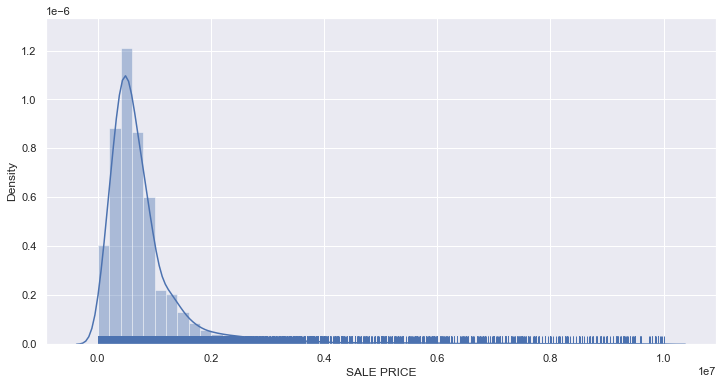

In [18]:
plt.figure(figsize=(12,6))
sns.distplot(df2['SALE PRICE'], kde=True, bins=50, rug=True)
plt.show()

The following plots are density plots that show how sales price relate with each other. We can see it is right-skewed and that most residences are towards the lower end, but there are still many sales on the higher end. We are going to adjust the bin size to see if it makes a difference to the normality of the plot.

/Users/jordanworthen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jordanworthen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


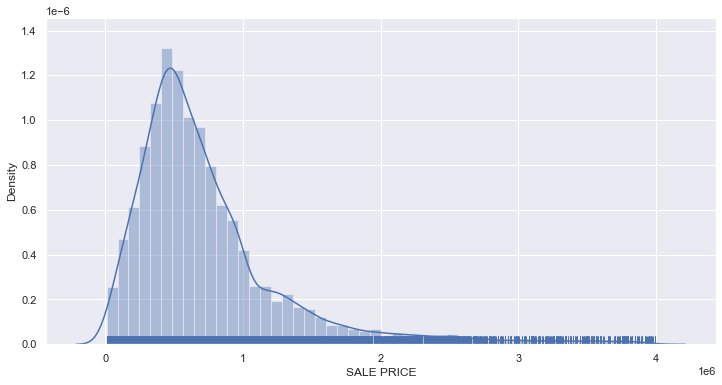

In [19]:
df2= df2[(df2['SALE PRICE']<4000000)]
plt.figure(figsize=(12,6))
sns.distplot(df2['SALE PRICE'], kde=True, bins=50, rug=True)
plt.show()

/Users/jordanworthen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jordanworthen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


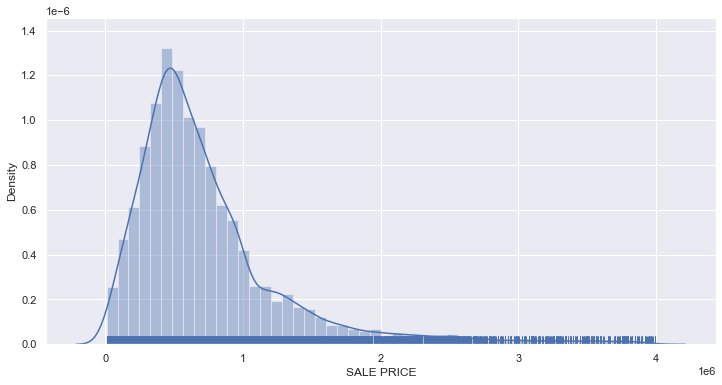

In [20]:
plt.figure(figsize=(12,6))
sns.distplot(df2['SALE PRICE'], kde=True, bins=50, rug=True)
plt.show()

/Users/jordanworthen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jordanworthen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


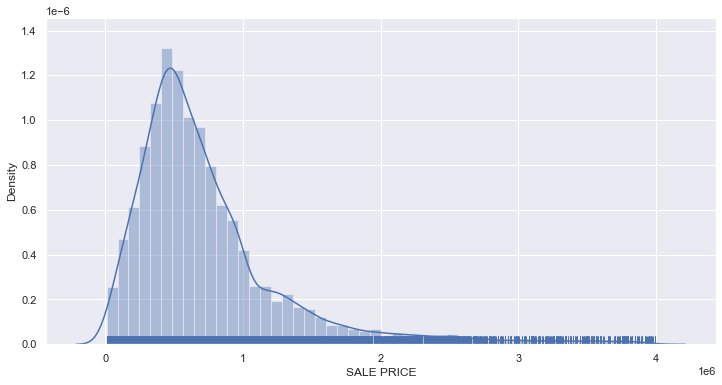

In [21]:
df2= df2[(df2['SALE PRICE']<4000000)]
plt.figure(figsize=(12,6))
sns.distplot(df2['SALE PRICE'], kde=True, bins=50, rug=True)
plt.show()

In [22]:
df2[df2['YEAR BUILT']==0]['YEAR BUILT'].count()

1434

/Users/jordanworthen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jordanworthen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


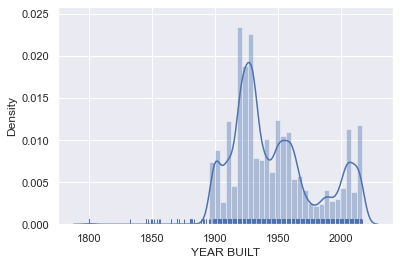

In [23]:
df3=df2[df2['YEAR BUILT']!=0].copy()
sns.distplot(df3['YEAR BUILT'], bins=50, rug=True)
plt.show()

This plot shows us the desnity of homes built in each year. It looks like a little after 1900 the most buildings were built which makes sense. This plot is not normal.

In [24]:
df3[df3['TOTAL UNITS']==0]['TOTAL UNITS'].count()

3426

/Users/jordanworthen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jordanworthen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


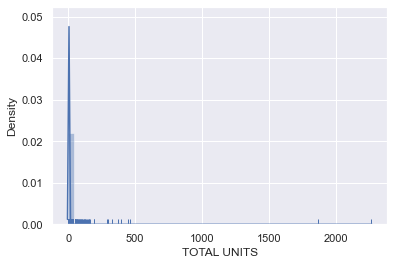

In [25]:
df4=df3[df3['TOTAL UNITS']!=0].copy()
sns.distplot(df4['TOTAL UNITS'], bins=50, rug=True)
plt.show()

In [26]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
BLOCK,30236.0,5418.821835,3753.775464,1.0,2395.0,4836.0,7677.0,16319.0
LOT,30236.0,185.704987,384.518819,1.0,22.0,44.0,83.0,3597.0
RESIDENTIAL UNITS,30236.0,1.970532,12.586963,0.0,1.0,1.0,2.0,1844.0
COMMERCIAL UNITS,30236.0,0.173039,13.034598,0.0,0.0,0.0,0.0,2261.0
TOTAL UNITS,30236.0,2.147804,18.198705,1.0,1.0,1.0,2.0,2261.0
LAND SQUARE FEET,30236.0,3133.582088,27966.319284,0.0,1816.5,2417.0,3500.0,4228300.0
GROSS SQUARE FEET,30236.0,2440.363276,23800.244758,0.0,1208.0,1680.0,2392.0,3750565.0
SALE PRICE,30236.0,793820.011146,594725.186839,10001.0,436000.0,630000.0,940000.0,3995000.0


In [27]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30236 entries, 3 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         30236 non-null  category      
 1   NEIGHBORHOOD                    30236 non-null  category      
 2   BUILDING CLASS CATEGORY         30236 non-null  category      
 3   TAX CLASS AT PRESENT            30236 non-null  category      
 4   BLOCK                           30236 non-null  int64         
 5   LOT                             30236 non-null  int64         
 6   BUILDING CLASS AT PRESENT       30236 non-null  category      
 7   ADDRESS                         30236 non-null  object        
 8   ZIP CODE                        30236 non-null  category      
 9   RESIDENTIAL UNITS               30236 non-null  int64         
 10  COMMERCIAL UNITS                30236 non-null  int64         
 11  TO

In [28]:
df4.drop(['BLOCK','LOT','ADDRESS'], axis=1, inplace=True)

In [29]:
df4['BOROUGH']= df4['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
df4.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_year,sale_month
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,2016,9
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,2016,9
172,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S3,10009,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,2016,11
195,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,K4,10009,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28,2016,9
222,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,C4,10011,9,0,9,1566.0,6330.0,1901,2,C4,1583840.0,2017-08-31,2017,8


In [30]:
df_bar =df4[['BOROUGH', 'SALE PRICE']].groupby(by='BOROUGH').mean().sort_values(by='SALE PRICE', ascending=True).reset_index()
df_bar

,BOROUGH,SALE PRICE
0,Staten Island,5.257797e+05
1,Bronx,5.581147e+05
2,Queens,7.079732e+05
3,Brooklyn,1.039752e+06
4,Manhattan,1.846523e+06


This chart shows the average sale price for each borough. It looks pretty messy with the scientific notation so lets put it in a graph.

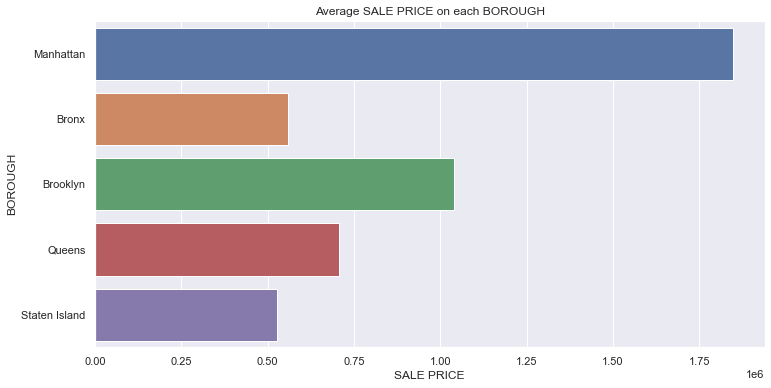

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'BOROUGH', x = 'SALE PRICE', data = df_bar )
plt.title('Average SALE PRICE on each BOROUGH')
plt.show()

This graph shows the average sale price on each borough. We can see that Manhattan kinda blows all the other boroughs out of the water. I don't really like using averages to see home price because there are always many outliers. In this case, I bet Manhattan is so high because they have some very expensive homes that will skew the average.

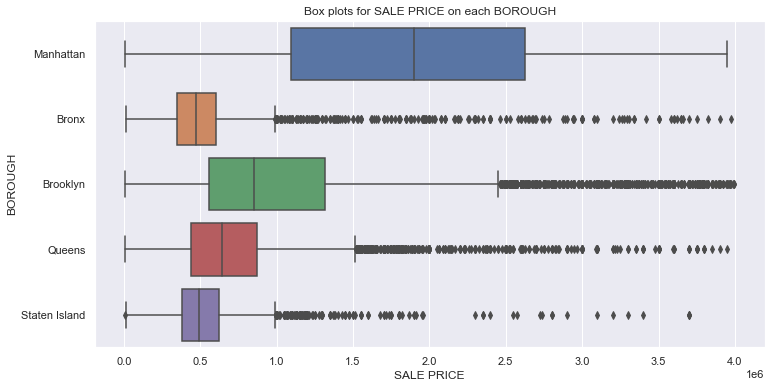

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'BOROUGH', x = 'SALE PRICE', data = df4 )
plt.title('Box plots for SALE PRICE on each BOROUGH')
plt.show()

From this boxplot you can see that Manhattan has the biggest biggest box area and the highest median sale price. It also doesn't show that Manhattan has any outliers which is interesting. The other boxplots show many outliers and I would guess this is because that there may be random very nice buildings that sell for more than normal residences. Since the Bronx and Staten Island are less desirable areas for people to buy a residence, it would make sense that they have lower median sale price.

In [33]:
df_bar=df4[['sale_month', 'SALE PRICE']].groupby(by='sale_month').count().sort_values(by='sale_month', ascending=True).reset_index()
df_bar.columns.values[1]='Sales_count'
df_bar

,sale_month,Sales_count
0,1,2432
1,2,2323
2,3,2782
3,4,2344
4,5,2565
5,6,2931
6,7,2328
7,8,1937
8,9,2807
9,10,2373


This table shows the amount of sales that happened each month.

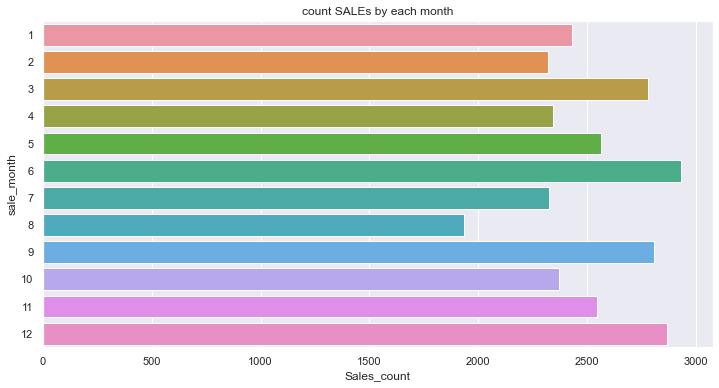

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'sale_month', x = 'Sales_count', data = df_bar )
plt.title('count SALEs by each month')
plt.show()

This graph shows how many sales happened each month. It looks like Decemeber and June have the highest sales amount. I think that June probably has the highest sale date because it might be easier to move in the summer rather than it being cold. With that being said, December also has a high sale amount, but it could be cause people might have gotten some bonus' or things like that. It also might have something to do with all levels of school being that people move when school years are done, whether its college or just high school.